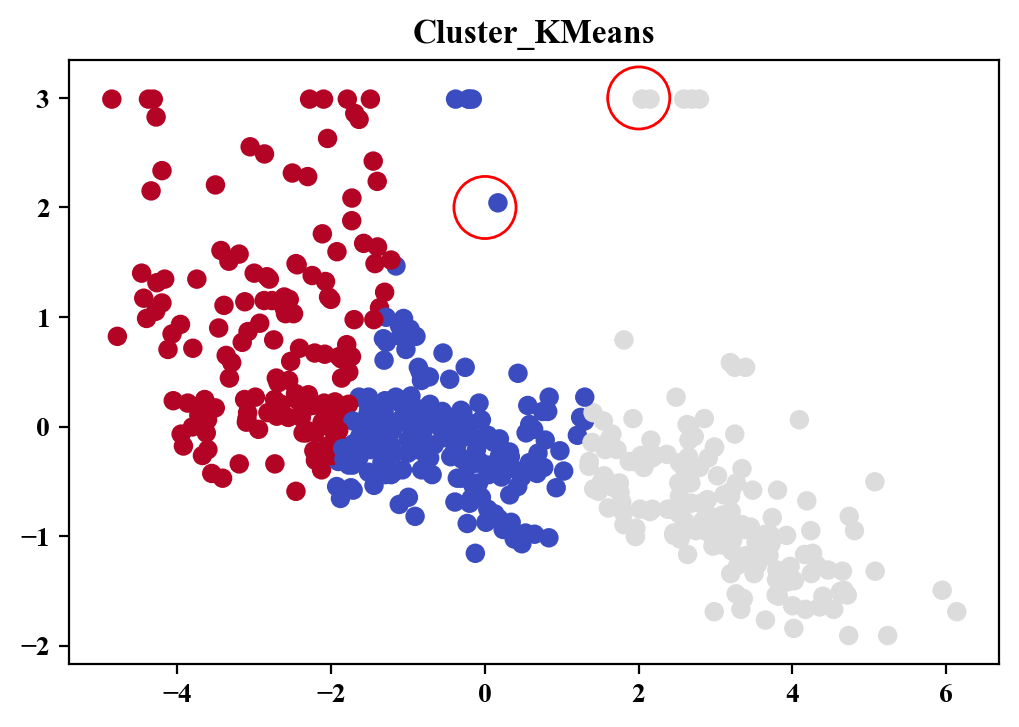

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from matplotlib import cm
data_pool=load_boston()
X=data_pool.data
Y=data_pool.target
X=StandardScaler().fit_transform(X)
x=PCA(n_components=1).fit_transform(X)
y=StandardScaler().fit_transform(Y.reshape(-1,1))
data=np.c_[x,y]
clt=KMeans(n_clusters=3)
clt.fit(data)
plt.figure(dpi=200)
plt.rc('font',family='Times New Roman')
plt.scatter(x[:,0],y[:,0],c=clt.labels_,cmap=cm.coolwarm)
plt.scatter(0,2,s=500,edgecolors='r',color='')
plt.scatter(2,3,s=500,color='',edgecolors='r')
plt.title('Cluster_KMeans')
plt.show()

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_boston
from sklearn.preprocessing.data import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib import cm
# 读取全数据集
bostondata = load_boston()
boston_X = bostondata.data
boston_Y = bostondata.target
# 进行全数据集归一化
scale = StandardScaler()
boston_std = scale.fit_transform(boston_X)
boston_y=scale.fit_transform(boston_Y.reshape(-1,1))
# 数据集降维为3维，方便可视化调参。
pca = PCA(n_components=1)
boston_full = pca.fit_transform(boston_std)
boston_full=np.c_[boston_full,boston_y]
# 分类
clt = DBSCAN(eps=0.4, min_samples=5, n_jobs=4)
clt.fit(X=boston_full)
# 给定输出数据
data=boston_X[clt.labels_==0]
target=boston_Y[clt.labels_==0]
np.savetxt('Boston_data',data,delimiter=',')
np.savetxt('Boston_txt',target,delimiter=',')
plt.figure(dpi=200)
plt.rc('font',family='Times New Roman')
plt.scatter(boston_full[:,0],boston_full[:,1],c=clt.labels_,cmap=cm.coolwarm)
plt.title('Cluster_DBSCAN')
# plt.show()

Text(0.5, 1.0, 'Cluster_DBSCAN')

In [1]:
from likefunctions_boston import spl_and_Std_boston
from sklearn.linear_model import LinearRegression
result=[]
for i in range(100):
    x_train,x_test,y_train,y_test=spl_and_Std_boston()
    clf=LinearRegression(fit_intercept=True)
    clf.fit(x_train,y_train)
    score=clf.score(x_test,y_test)
    result.append(score)
print(score.mean())

0.815087332689197


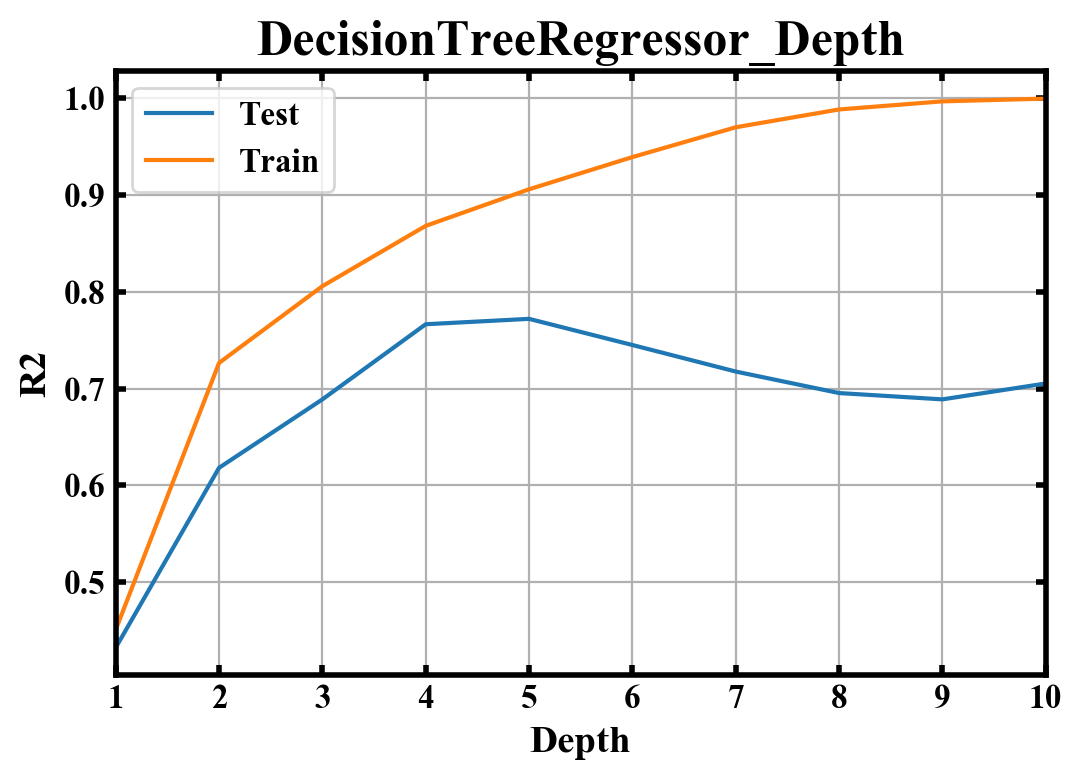

In [5]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,Dtr_depth_random_100,spl_and_Std_boston,Dtr_depth_pca_random_100
import numpy as np
number=10
result=np.zeros((number))
result_train=np.zeros((number))
for depth,idx in enumerate(range(number)):
    accuracy,accuracy_train=Dtr_depth_pca_random_100(Depth=depth+1)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='Depth',ylabel='R2',title='DecisionTreeRegressor_Depth')
plt.plot(list(range(1,number+1)),result)
plt.plot(list(range(1,number+1)),result_train)
plt.xticks(range(1,number+1,int(number/10)))
plt.tick_params(direction='in',width=2,top=True,right=True)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(1,number)
plt.show()

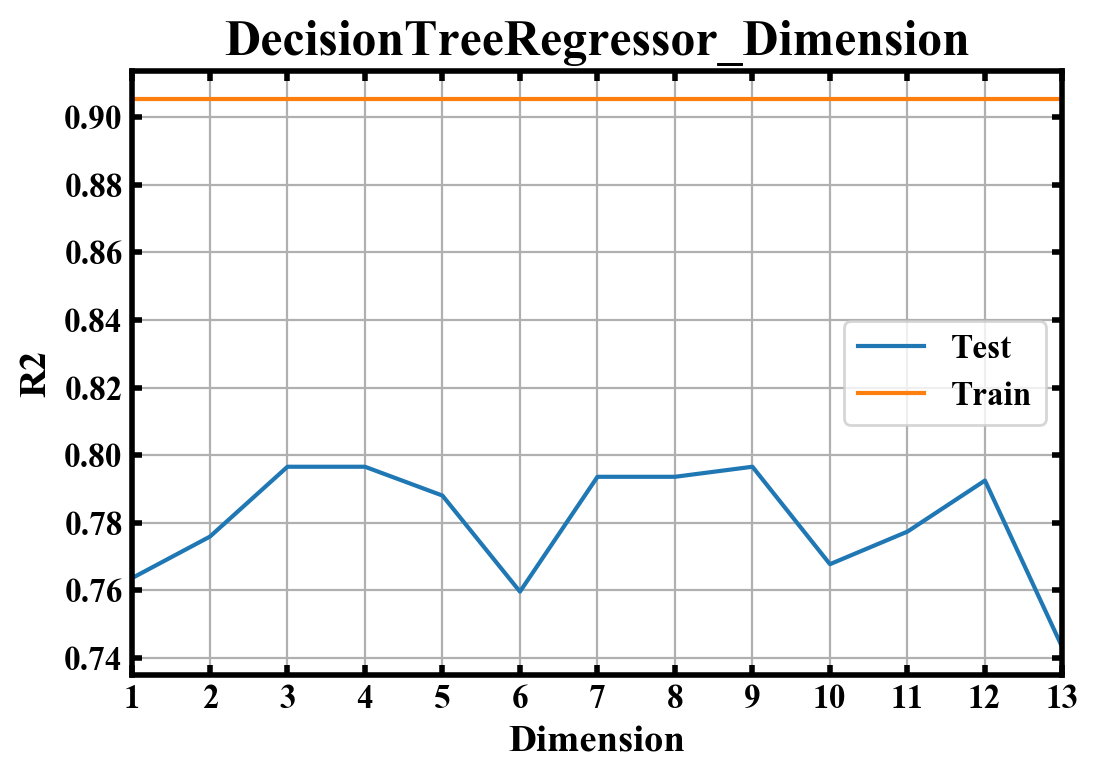

In [11]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,Dtr_pca
import numpy as np
number=13
result=np.zeros((number))
result_train=np.zeros((number))
for dimension,idx in enumerate(range(number)):
    accuracy,accuracy_train=Dtr_pca(dimension=dimension+1)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='Dimension',ylabel='R2',title='DecisionTreeRegressor_Dimension')
plt.plot(list(range(1,number+1)),result)
plt.plot(list(range(1,number+1)),result_train)
plt.xticks(range(1,number+1,int(number/10)))
plt.tick_params(direction='in',width=2,top=True,right=True)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(1,number)
plt.show()

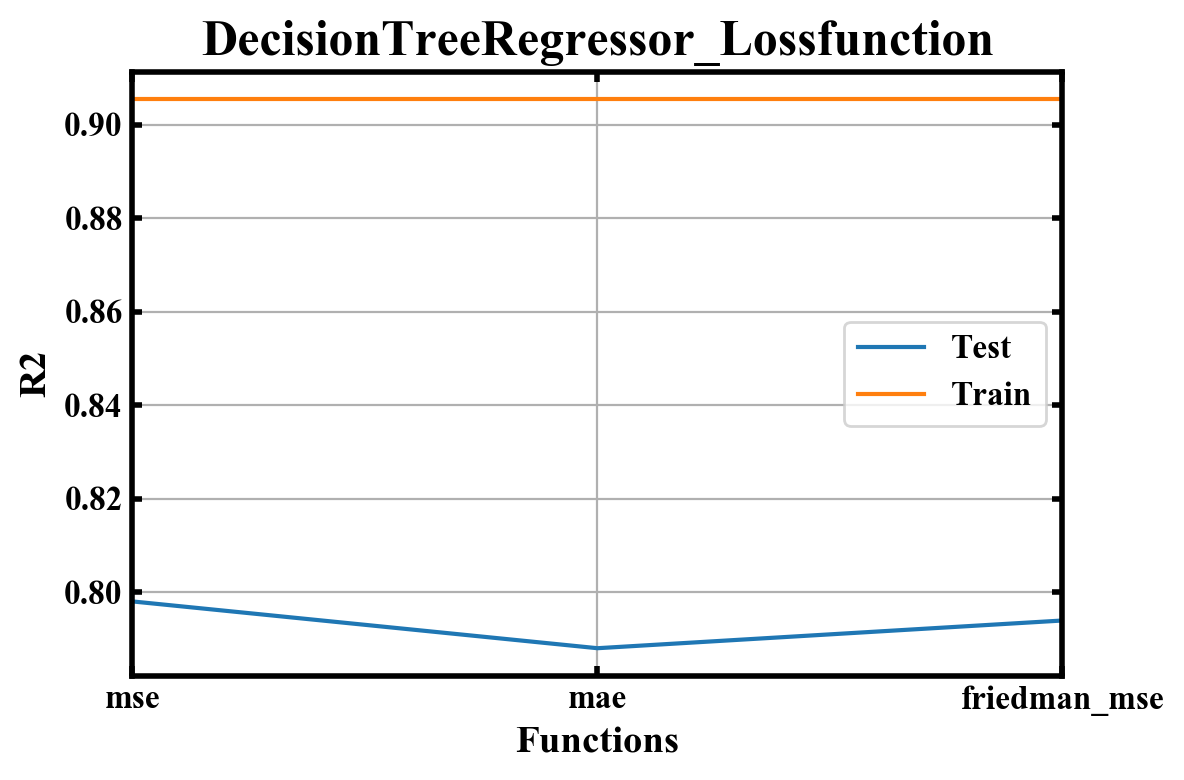

In [10]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,Dtr_lossf
import numpy as np
from math import ceil
C=['mse','mae','friedman_mse']
number=len(C)
result=np.zeros(number)
result_train=np.zeros(number)
for idx,i in enumerate(C):
    accuracy,accuracy_train=Dtr_lossf(function=i)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='Functions',ylabel='R2',title='DecisionTreeRegressor_Lossfunction')
plt.plot(C,result)
plt.plot(result_train)
plt.tick_params(direction='in',width=2,top=True,right=True)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(0,number-1)
plt.show()

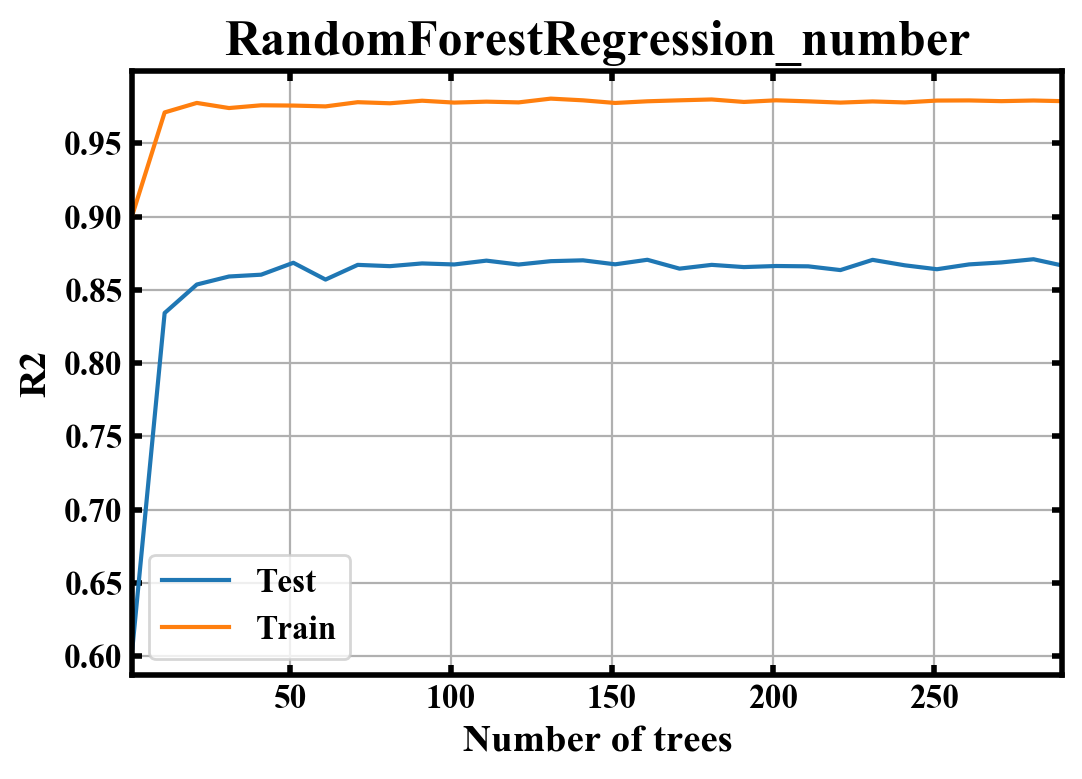

In [2]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,RandomForestRegression_number
import numpy as np
from math import ceil
C=list(range(1,300,10))
number=len(C)
result=np.zeros(number)
result_train=np.zeros(number)
for idx,i in enumerate(C):
    accuracy,accuracy_train=RandomForestRegression_number(number=i)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='Number of trees',ylabel='R2',title='RandomForestRegression_number')
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(1,max(C)-1)
plt.show()

0.8198494825123414


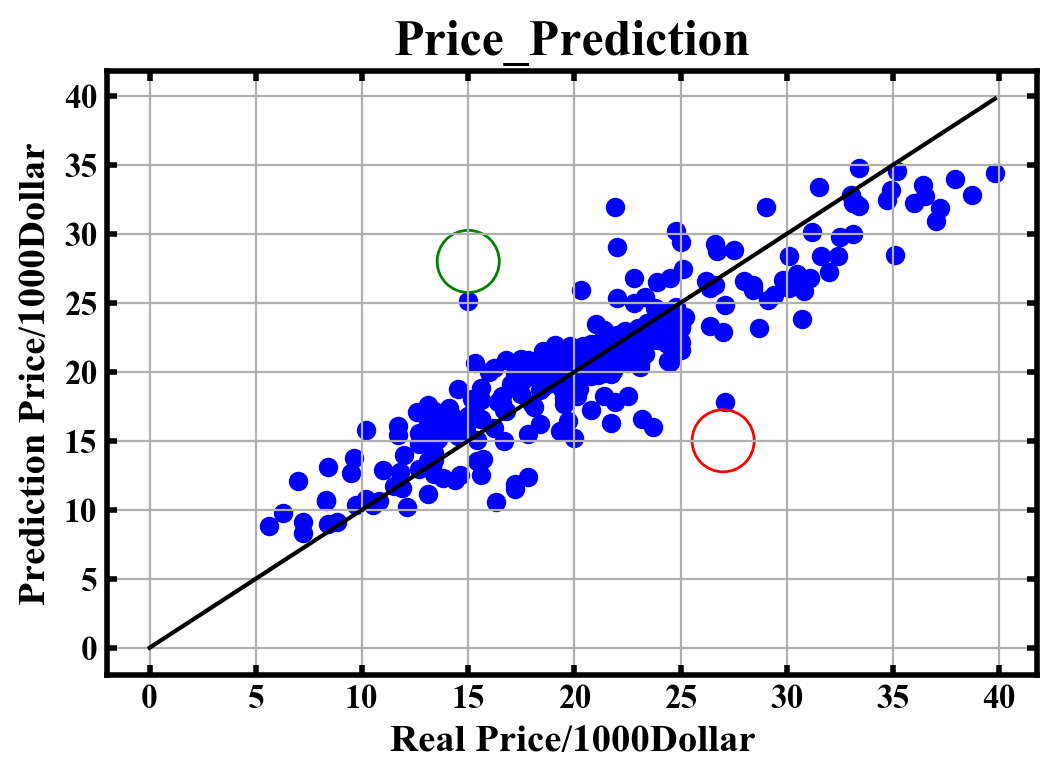

In [23]:
from matplotlib import  pyplot as plt
from likefunctions_boston import spl_and_Std_boston,plotlikeconfig
from sklearn.ensemble import RandomForestRegressor
import numpy as np
x_train, x_test, y_train, y_test = spl_and_Std_boston(origin=False)
clf = RandomForestRegressor(n_estimators=100)
clf.fit(x_train, y_train)
result=clf.predict(x_test)
print(clf.score(x_test,y_test))
plotlikeconfig(xlabel='Real Price/1000Dollar',ylabel='Prediction Price/1000Dollar',title='Price_Prediction')
plt.scatter(y_test,result,color='b')
plt.plot(np.linspace(0,max(y_test),100),np.linspace(0,max(y_test),100),color='black')
plt.scatter(27,15,s=500,edgecolors='r',color='')
plt.scatter(15,28,s=500,edgecolors='g',color='')
plt.grid()
plt.show()

[0.7891045322768934, 0.8146507827005813, 0.8637609046262762, 0.9088321790523456]


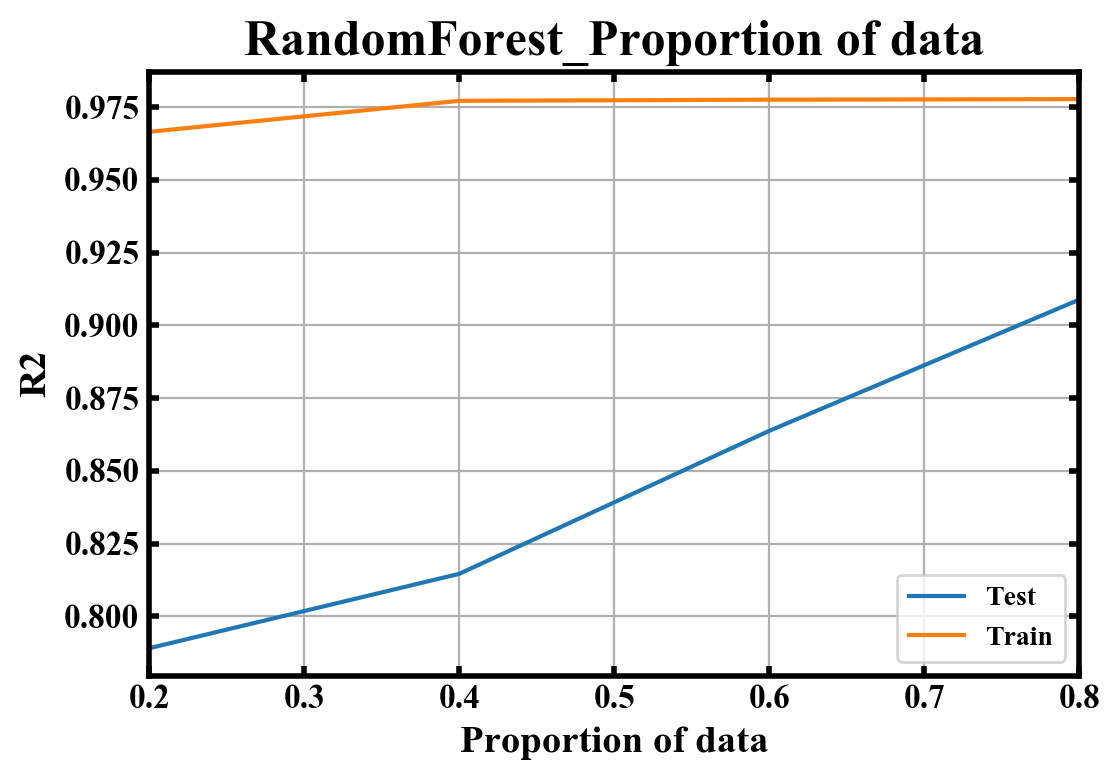

In [7]:
from matplotlib import  pyplot as plt
from likefunctions_boston import spl_and_Std_boston,plotlikeconfig
from sklearn.ensemble import RandomForestRegressor
import numpy as np
C=np.linspace(0.2,0.8,4)
result=[]
result_train=[]
for idx,factual in enumerate(C):
    x_train, x_test, y_train, y_test = spl_and_Std_boston(origin=False,factual=factual)
    clf = RandomForestRegressor(n_estimators=100)
    clf.fit(x_train, y_train)
    result.append(clf.score(x_test,y_test))
    result_train.append(clf.score(x_train,y_train))
print(result)
plotlikeconfig(xlabel='Proportion of data',ylabel='R2',title='RandomForest_Proportion of data')
plt.plot(C,result)
plt.plot(C,result_train)
# plt.scatter(27,15,s=500,edgecolors='r',color='')
# plt.scatter(15,28,s=500,edgecolors='g',color='')
plt.legend(['Test','Train'])
plt.xlim(min(C),max(C))
plt.grid()
plt.show()

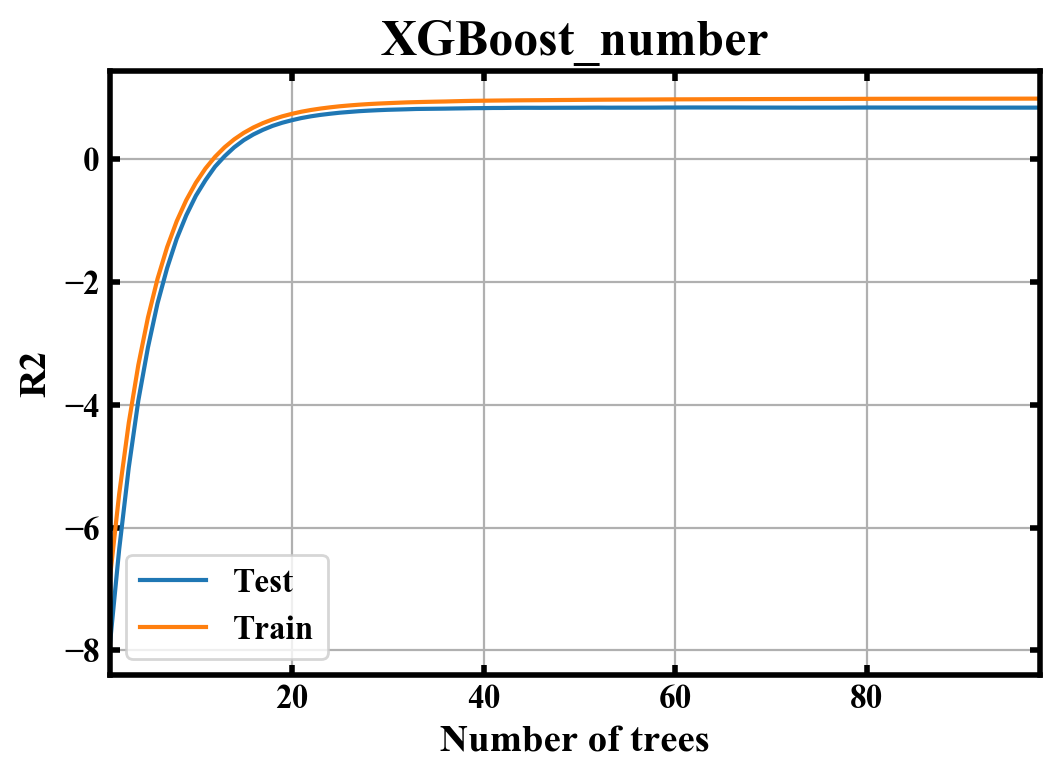

In [3]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,xgboost_number
import numpy as np
from math import ceil
C=list(range(1,100,1))
number=len(C)
result=np.zeros(number)
result_train=np.zeros(number)
for idx,i in enumerate(C):
    accuracy,accuracy_train=xgboost_number(number=i)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='Number of trees',ylabel='R2',title='XGBoost_number')
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(1,max(C)-1)
plt.show()


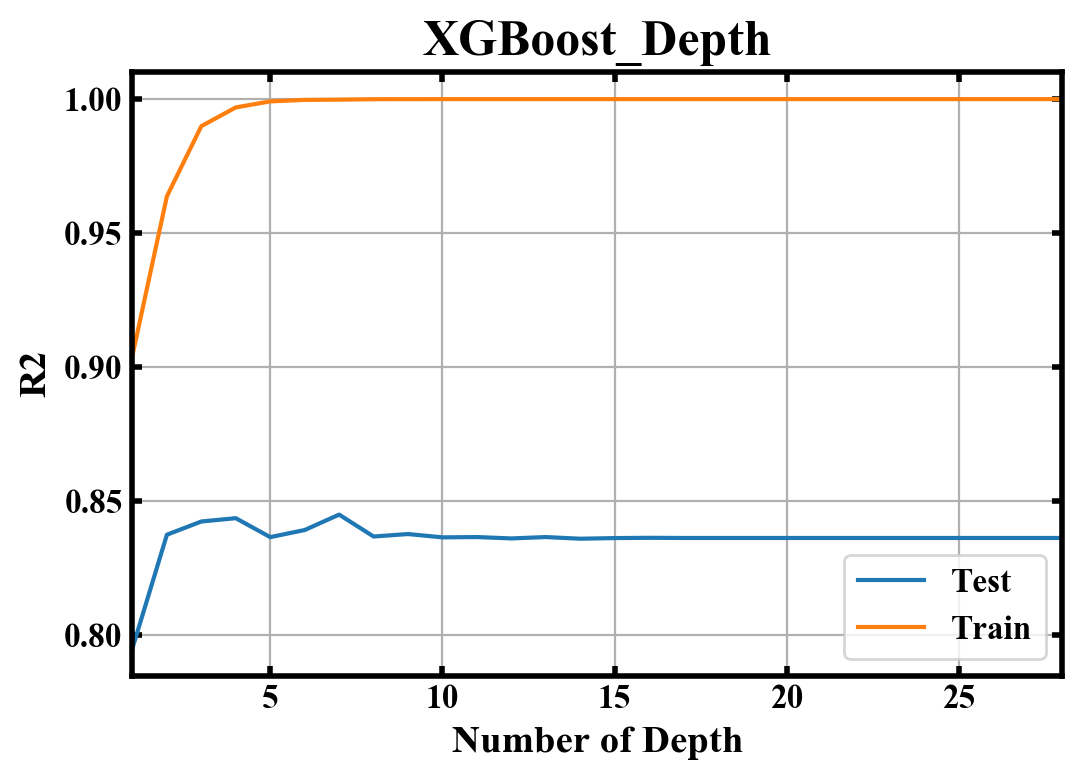

In [5]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,xgboost_depth
import numpy as np
from math import ceil
C=list(range(1,30,1))
number=len(C)
result=np.zeros(number)
result_train=np.zeros(number)
for idx,i in enumerate(C):
    accuracy,accuracy_train=xgboost_depth(depth=i)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='Number of Depth',ylabel='R2',title='XGBoost_Depth')
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(1,max(C)-1)
plt.show()

0.8454740668968534


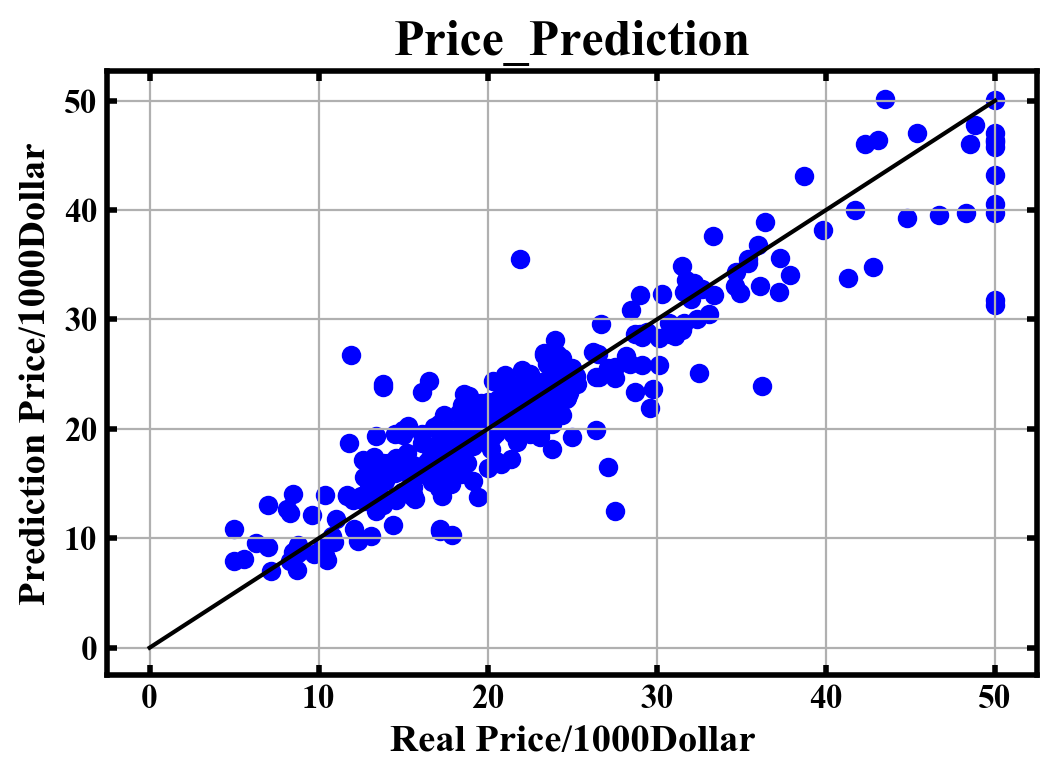

In [16]:
from matplotlib import  pyplot as plt
from likefunctions_boston import spl_and_Std_boston,plotlikeconfig
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from xgboost import XGBRegressor
x_train, x_test, y_train, y_test = spl_and_Std_boston(origin=True)
clf = XGBRegressor(max_depth=4,n_estimators=100,objective='reg:squarederror')
clf.fit(x_train, y_train)
result=clf.predict(x_test)
print(clf.score(x_test,y_test))
plotlikeconfig(xlabel='Real Price/1000Dollar',ylabel='Prediction Price/1000Dollar',title='Price_Prediction')
plt.scatter(y_test,result,color='b')
plt.plot(np.linspace(0,max(y_test),100),np.linspace(0,max(y_test),100),color='black')
# plt.scatter(27,15,s=500,edgecolors='r',color='')
# plt.scatter(15,28,s=500,edgecolors='g',color='')
plt.grid()
plt.show()

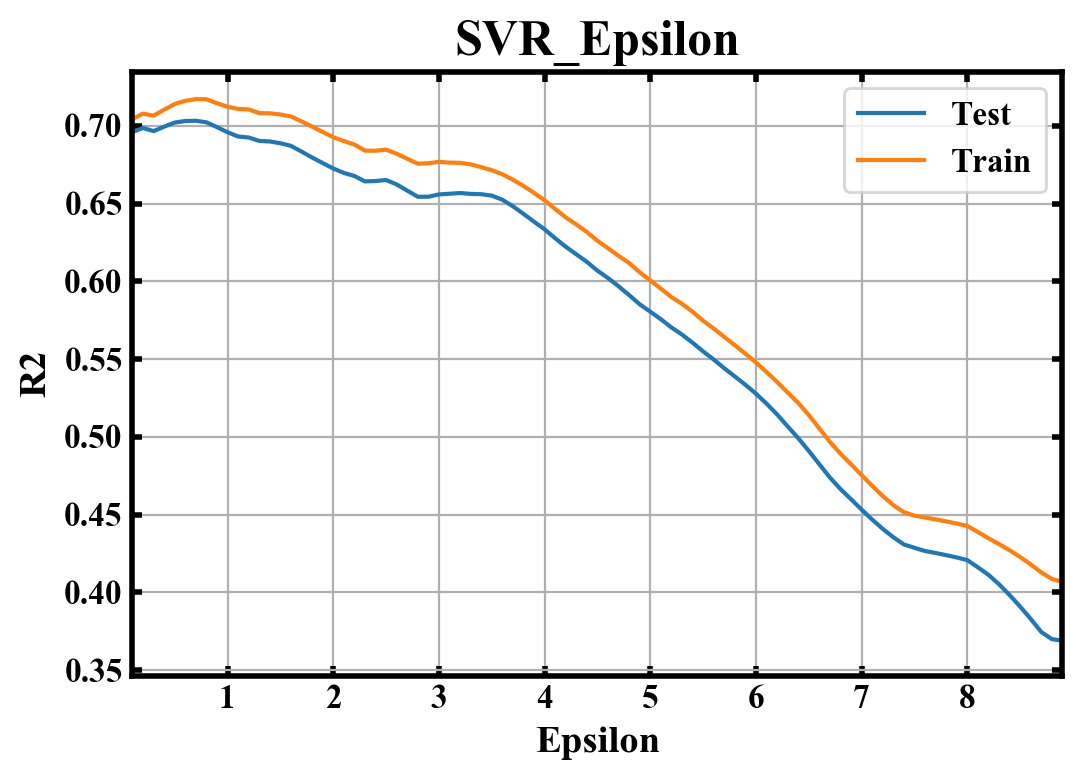

In [6]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,svr_epsilon
import numpy as np
from math import ceil
C=np.array(range(1,100,1))/10
number=len(C)
result=np.zeros(number)
result_train=np.zeros(number)
for idx,i in enumerate(C):
    accuracy,accuracy_train=svr_epsilon(epsilon=i)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='Epsilon',ylabel='R2',title='SVR_Epsilon')
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(min(C),max(C)-1)
plt.show()

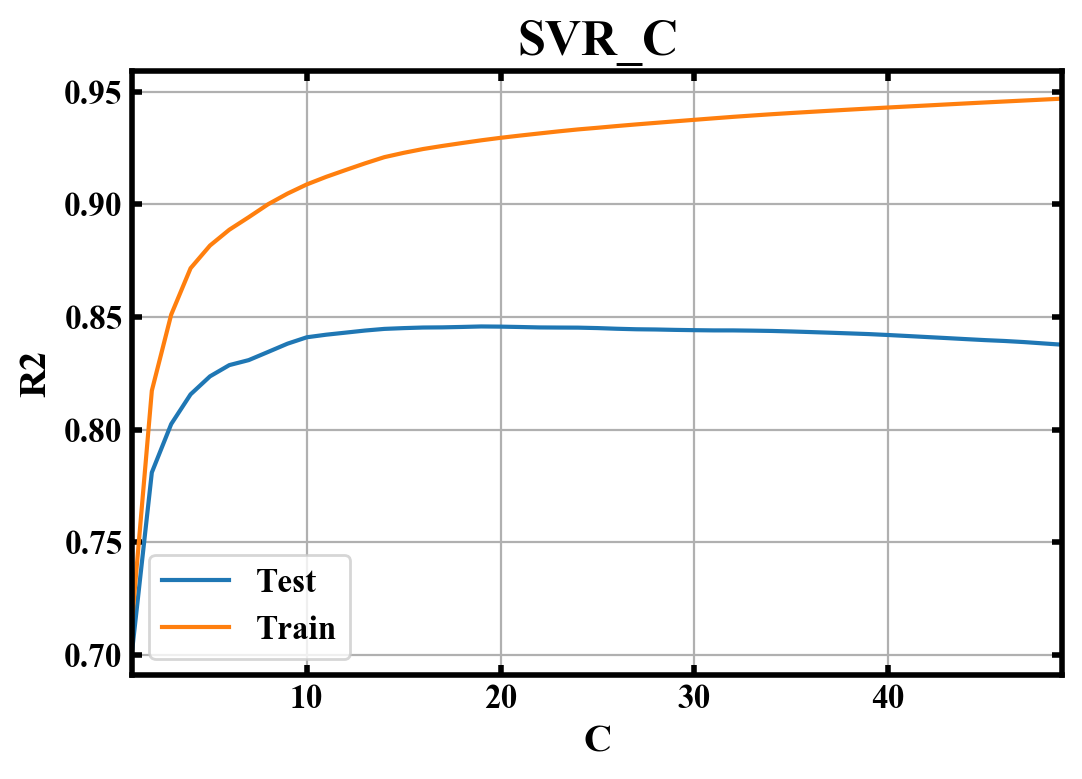

In [5]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,svr_C
import numpy as np
from math import ceil
C=np.array(range(1,50,1))
number=len(C)
result=np.zeros(number)
result_train=np.zeros(number)
for idx,i in enumerate(C):
    accuracy,accuracy_train=svr_C(C=i)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='C',ylabel='R2',title='SVR_C')
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(min(C),max(C))
plt.show()


0.8450797586898726


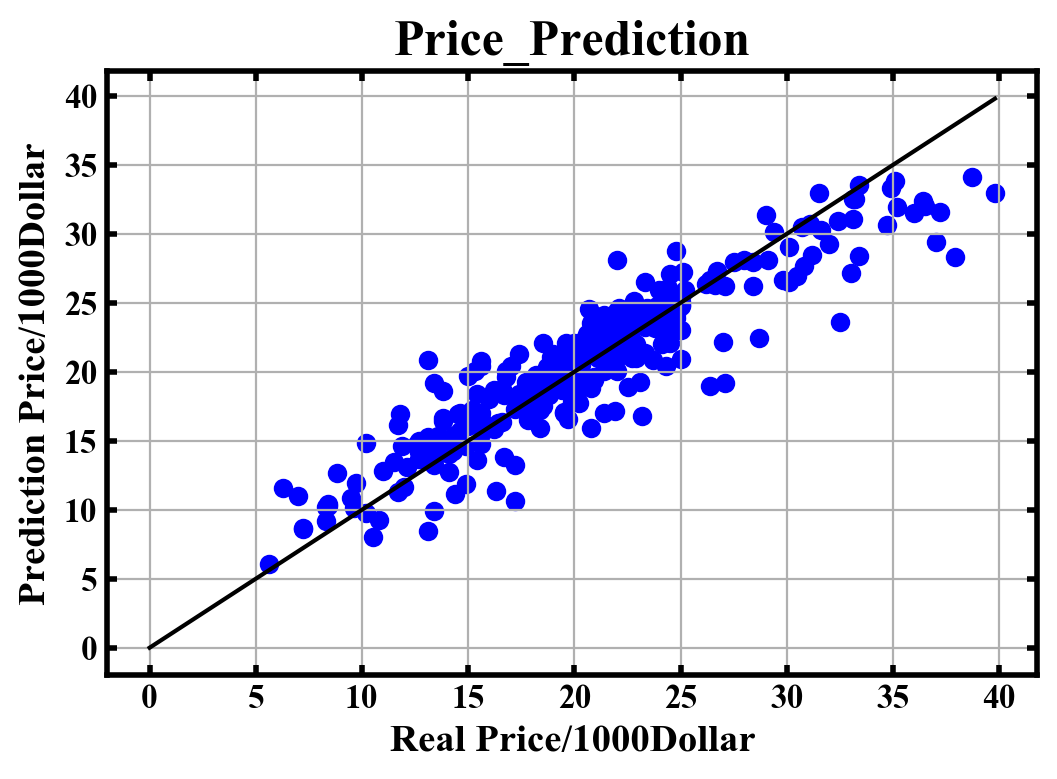

In [13]:
from matplotlib import  pyplot as plt
from likefunctions_boston import spl_and_Std_boston,plotlikeconfig
import numpy as np
from xgboost import XGBRegressor
from sklearn.svm import SVR
x_train, x_test, y_train, y_test = spl_and_Std_boston(origin=False)
clf = SVR(C=15,epsilon=0.7)
clf.fit(x_train, y_train)
result=clf.predict(x_test)
print(clf.score(x_test,y_test))
plotlikeconfig(xlabel='Real Price/1000Dollar',ylabel='Prediction Price/1000Dollar',title='Price_Prediction')
plt.scatter(y_test,result,color='b')
plt.plot(np.linspace(0,max(y_test),100),np.linspace(0,max(y_test),100),color='black')
# plt.scatter(27,15,s=500,edgecolors='r',color='')
# plt.scatter(15,28,s=500,edgecolors='g',color='')
plt.grid()
plt.show()

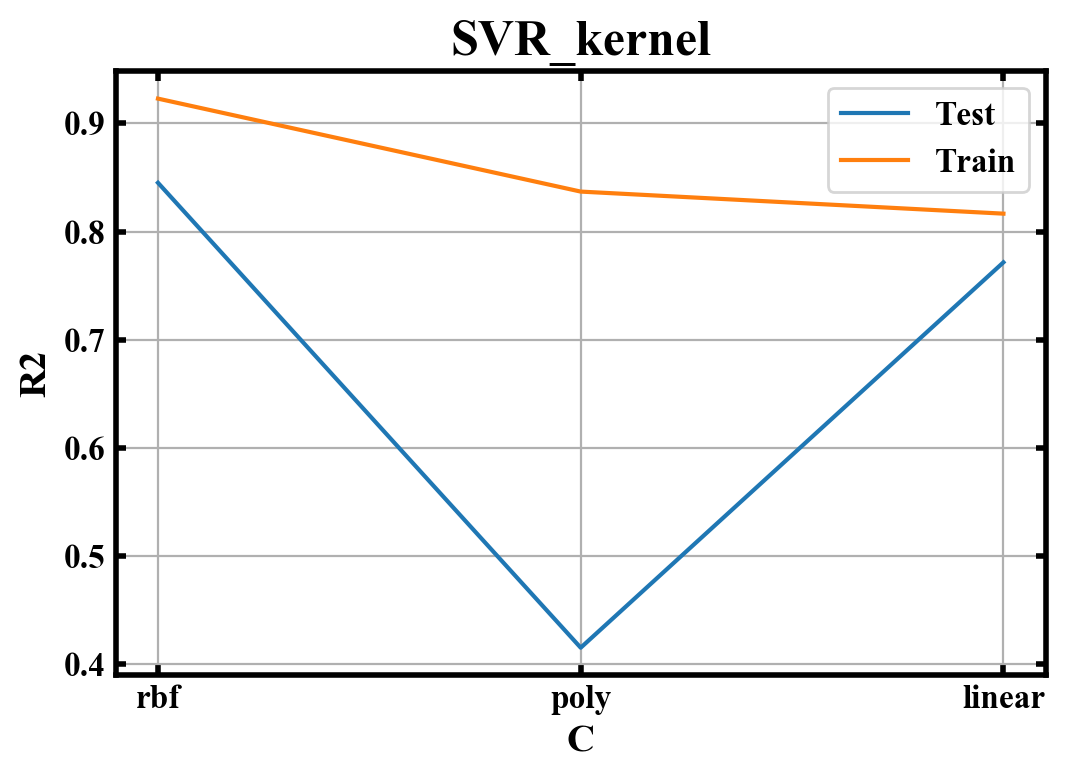

In [9]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,svr_kernel
import numpy as np
from math import ceil
C=['rbf','poly','linear']
number=len(C)
result=np.zeros(number)
result_train=np.zeros(number)
for idx,i in enumerate(C):
    accuracy,accuracy_train=svr_kernel(kernel=i)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='C',ylabel='R2',title='SVR_kernel')
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
# plt.xlim(min(C),max(C))
plt.show()

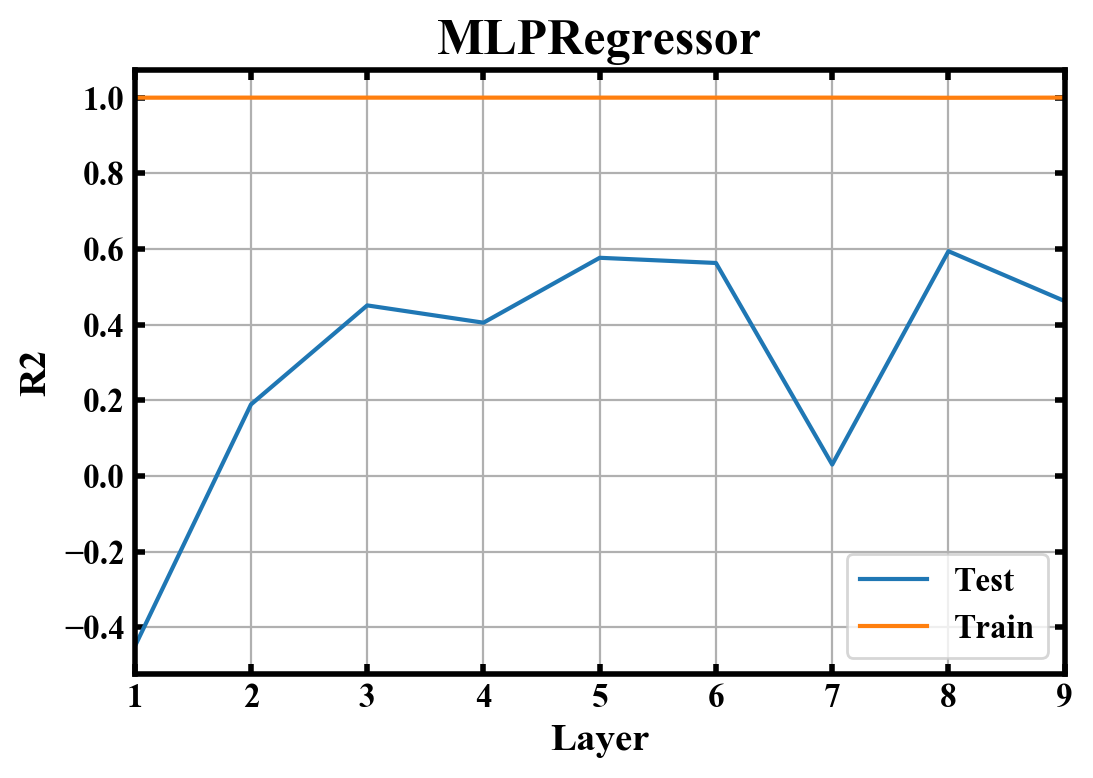

In [3]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,ann_depth
import numpy as np
from math import ceil
C=np.array(range(1,10,1))
number=len(C)
result=np.zeros(number)
result_train=np.zeros(number)
for idx,i in enumerate(C):
    accuracy,accuracy_train=ann_depth(depth=i,init=13)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='Layer',ylabel='R2',title='MLPRegressor')
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(min(C),max(C))
plt.show()

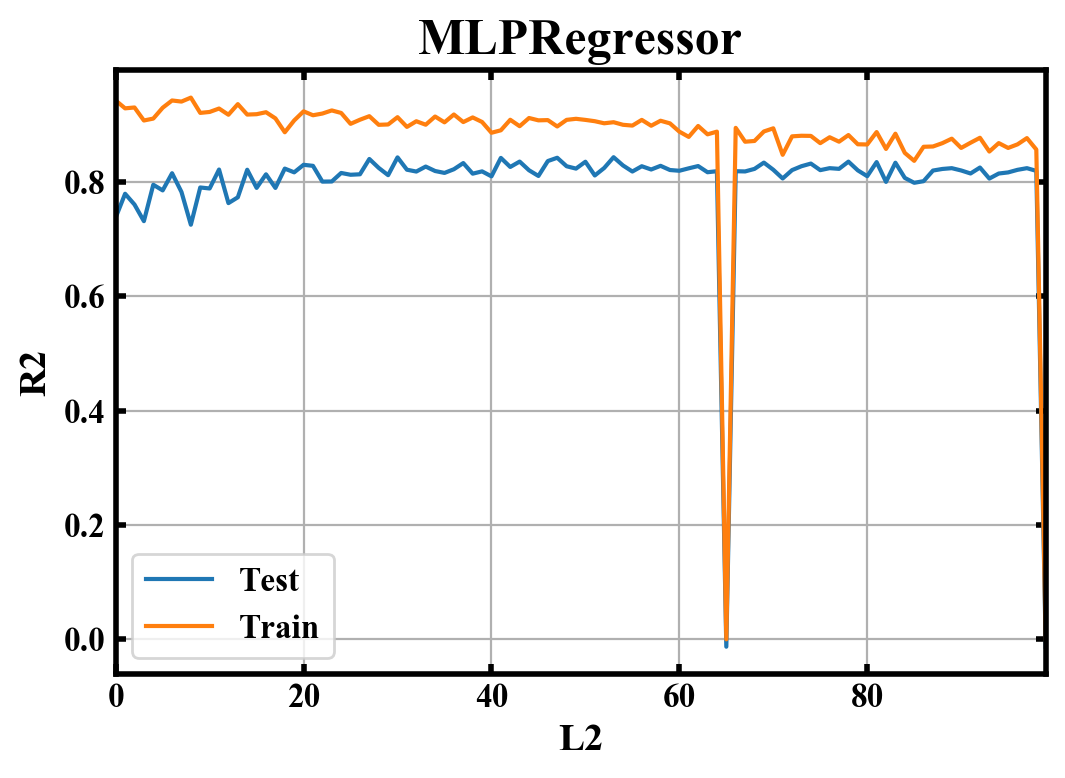

In [5]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,ann_L2
import numpy as np
from math import ceil
C=np.array(range(0,100))/1
number=len(C)
result=np.zeros(number)
result_train=np.zeros(number)
for idx,i in enumerate(C):
    accuracy,accuracy_train=ann_L2(depth=3,init=3,L2=i)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='L2',ylabel='R2',title='MLPRegressor')
plt.plot(C,result)
plt.plot(C,result_train)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(min(C),max(C))
plt.show()

In [2]:
from matplotlib import  pyplot as plt
from likefunctions_boston import spl_and_Std_boston,plotlikeconfig
import numpy as np
from sklearn.neural_network import MLPRegressor
from math import ceil
x_train, x_test, y_train, y_test = spl_and_Std_boston(origin=False)
layer=np.array([ceil(3*0.9**i) for i in range(1,3+1)])
pca=PCA(n_components=3)
pca.fit_transform(x_train)
pca.transform(x_test)
clf =MLPRegressor(hidden_layer_sizes=layer,max_iter=100000,solver='lbfgs',alpha=80)
clf.fit(x_train,y_train)
result=clf.predict(x_test)
print(clf.score(x_test,y_test))
plotlikeconfig(xlabel='Real Price/1000Dollar',ylabel='Prediction Price/1000Dollar',title='Price_Prediction')
plt.scatter(y_test,result,color='b')
plt.plot(np.linspace(0,max(y_test),100),np.linspace(0,max(y_test),100),color='black')
# plt.scatter(27,15,s=500,edgecolors='r',color='')
# plt.scatter(15,28,s=500,edgecolors='g',color='')
plt.grid()
plt.show()


NameError: name 'PCA' is not defined